In [ ]:
import pandas as pd
import yfinance as yf

doge = yf.Ticker("DOGE-USD")
all_data = doge.history(period="1y", interval="1d")
data = all_data[["Open", "Close", "High", "Low", "Volume"]]

display(data)

,Open,Close,High,Low,Volume
Date,,,,,
2024-07-01 00:00:00+00:00,0.124304,0.123442,0.127236,0.123248,452573746
2024-07-02 00:00:00+00:00,0.123439,0.125016,0.125094,0.122462,408063753
2024-07-03 00:00:00+00:00,0.125019,0.118471,0.125326,0.117045,657681923
2024-07-04 00:00:00+00:00,0.118448,0.104887,0.118948,0.104431,1239123198
2024-07-05 00:00:00+00:00,0.104853,0.105594,0.106418,0.093795,1709690679
...,...,...,...,...,...
2025-06-26 00:00:00+00:00,0.164578,0.159986,0.167904,0.158370,916611999
2025-06-27 00:00:00+00:00,0.159986,0.161068,0.162597,0.157465,638328531
2025-06-28 00:00:00+00:00,0.161069,0.163692,0.164898,0.160631,400589442


Axes(0.125,0.2;0.775x0.68)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_44460\2272331190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Moving Average 1"] = data["Close"].rolling(window=7).mean()


,Open,Close,High,Low,Volume,Moving Average 1,Moving Average 2
Date,,,,,,,
2025-06-26 00:00:00+00:00,0.164578,0.159986,0.167904,0.158370,916611999,0.160375,0.180695
2025-06-27 00:00:00+00:00,0.159986,0.161068,0.162597,0.157465,638328531,0.160174,0.178704
2025-06-28 00:00:00+00:00,0.161069,0.163692,0.164898,0.160631,400589442,0.161534,0.177000
2025-06-29 00:00:00+00:00,0.163692,0.169602,0.169776,0.162712,543918306,0.164146,0.176205
2025-07-01 00:00:00+00:00,0.165147,0.164607,0.166119,0.164217,806713088,0.164181,0.175273


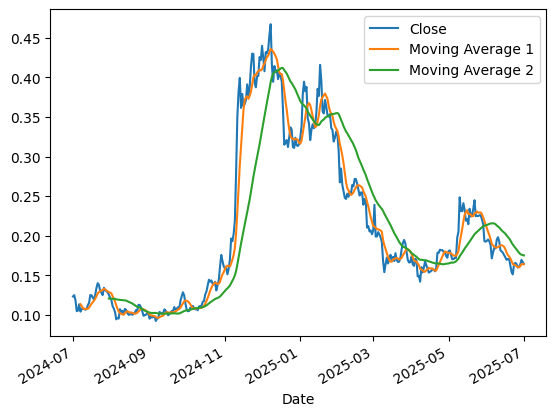

In [6]:
data["Moving Average 1"] = data["Close"].rolling(window=7).mean()
data["Moving Average 2"] = data["Close"].rolling(window=30).mean()
plot = data.plot.line(y=["Close", "Moving Average 1", "Moving Average 2"])

print(plot)
display(data.tail())

In [36]:
status_list = []
invested = 10000
balance = 10000
owned_units = 0
holding = False


for index, row in data.iterrows():
    if pd.notna(row["Moving Average 1"]) and pd.notna(row["Moving Average 2"]):
        if ((row["Moving Average 1"]) > row["Moving Average 2"]) and (holding == False) and (balance >= row["Close"]):
            status_list.append("Buy")
            holding = True
            owned_units = balance / row["Close"]
            balance = 0
        elif row["Moving Average 1"] < row["Moving Average 2"] and holding:
            status_list.append("Sell")
            holding = False
            balance = owned_units * row["Close"]
            owned_units = 0
        else:
            status_list.append("Hold")
    else:
        status_list.append(None)

data["Status"] = status_list
revenue = balance + owned_units * data["Close"].iloc[-1]
profit = revenue - invested

print(f"The profit is ${profit: .2f}")
display(data.tail(30))   

The profit is $ 15006.56


,Open,Close,High,Low,Volume,Moving Average 1,Moving Average 2,Status
Date,,,,,,,,
2025-06-01 00:00:00+00:00,0.192578,0.193632,0.194780,0.187268,939280532,0.209636,0.213689,Sell
2025-06-02 00:00:00+00:00,0.193632,0.195390,0.196065,0.188872,1007324701,0.205259,0.214343,Hold
2025-06-03 00:00:00+00:00,0.195396,0.193138,0.200251,0.192190,1062603805,0.200541,0.215096,Hold
2025-06-04 00:00:00+00:00,0.193139,0.188236,0.196910,0.187427,779255975,0.195892,0.215684,Hold
2025-06-05 00:00:00+00:00,0.188237,0.171628,0.192376,0.169233,1718819551,0.189720,0.215667,Hold
2025-06-06 00:00:00+00:00,0.171627,0.178973,0.184253,0.170184,1247591143,0.187654,0.215900,Hold
2025-06-07 00:00:00+00:00,0.178970,0.185168,0.188573,0.178034,836264651,0.186595,0.215486,Hold
2025-06-08 00:00:00+00:00,0.185168,0.184173,0.186751,0.181223,689923176,0.185244,0.214782,Hold
2025-06-09 00:00:00+00:00,0.184173,0.194933,0.195425,0.180454,1177667689,0.185178,0.212990,Hold
